In [65]:
import os
# Change to your project directory
os.chdir(r'C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis')


In [66]:
# Import the load_data function from the utils file
from utils.file_upload import load_data  # Adjust the path according to your project structure

# Load the data
xdr_data_df = load_data()

# Display the DataFrame
print(xdr_data_df.head())  # Display the first 5 rows of the DataFrame

C:\Users\sumey\Desktop\visual_projects\telecom_challenge\utils\file_upload.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  xdr_data_df = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

Top 10 Handsets Used by Customers:
Handset
Huawei Huawei B528S-23A                 19752
Apple Apple iPhone 6S (A1688)            9419
Apple Apple iPhone 6 (A1586)             9023
Apple Apple iPhone 7 (A1778)             6326
Apple Apple iPhone Se (A1723)            5187
Apple Apple iPhone 8 (A1905)             4993
Apple Apple iPhone Xr (A2105)            4568
Samsung Samsung Galaxy S8 (Sm-G950F)     4520
Apple Apple iPhone X (A1901)             3813
Samsung Samsung Galaxy A5 Sm-A520F       3724
Name: count, dtype: int64


C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\4242506526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdr_handset_df['Handset'] = xdr_handset_df['Handset Manufacturer'] + ' ' + xdr_handset_df['Handset Type']


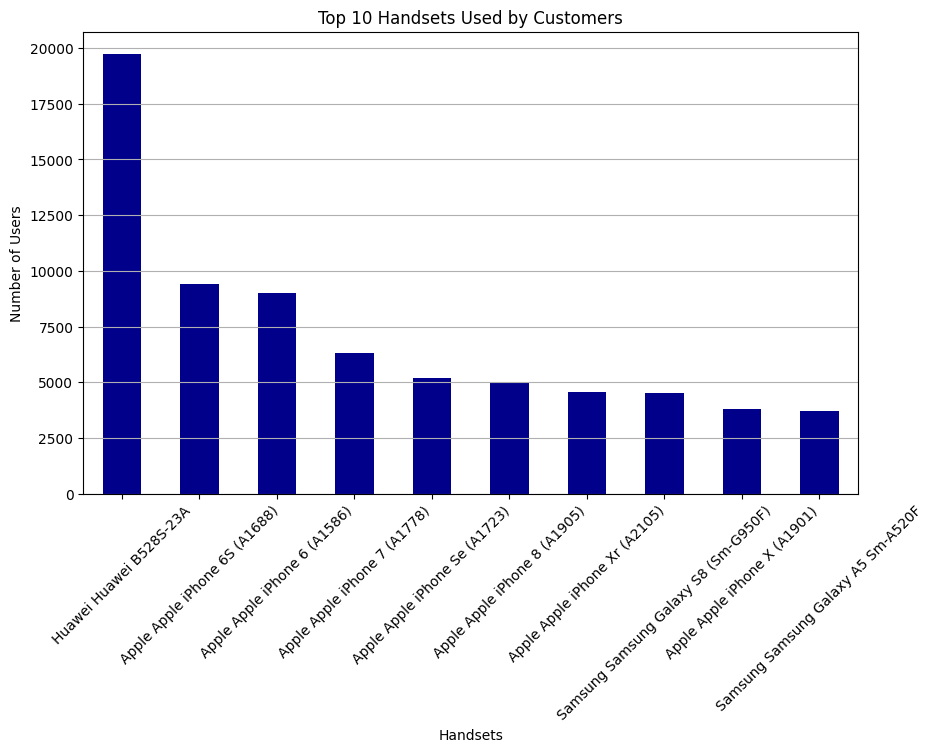

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Remove rows where Handset Manufacturer or Handset Type are undefined
xdr_handset_df=xdr_data_df[
    (xdr_data_df['Handset Manufacturer'] != 'undefined') &
    ( xdr_data_df['Handset Type'] !="undefined")]
   
# Combine the two columns to create a full handset description
xdr_handset_df['Handset'] = xdr_handset_df['Handset Manufacturer'] + ' ' + xdr_handset_df['Handset Type']

# Group by the full handset description and count occurrences
handset_counts = xdr_handset_df['Handset'].value_counts()

# Select the top 10 handsets
top_10_handsets = handset_counts.head(10)

# Display the results
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

# Visualization
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='darkblue')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handsets')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

top 3 manufacturer of handset
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


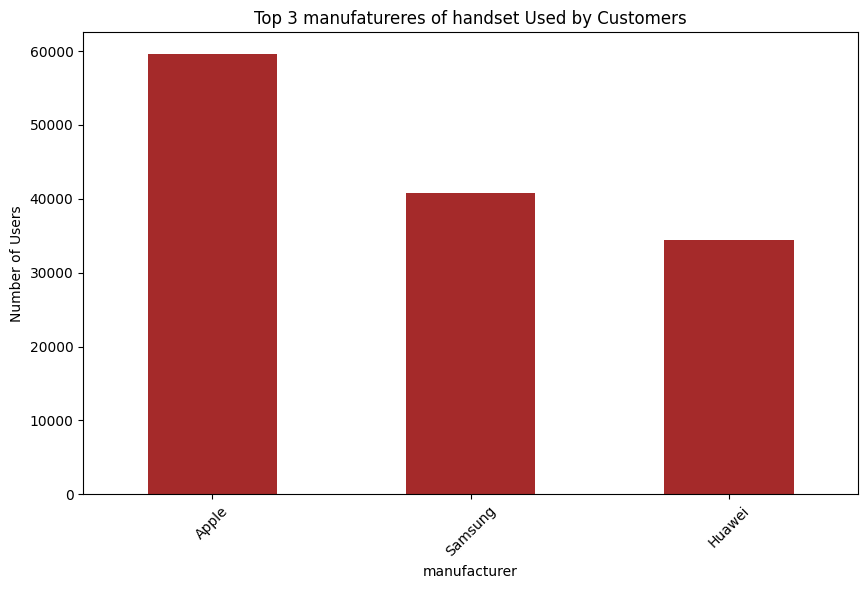

In [4]:
manufacturer_count = xdr_handset_df['Handset Manufacturer'].value_counts()
print ('top 3 manufacturer of handset')
top_3_manufacturer= manufacturer_count.head(3)
print(top_3_manufacturer)

# Visualization
plt.figure(figsize=(10, 6))
top_3_manufacturer.plot(kind='bar', color='brown')
plt.title('Top 3 manufatureres of handset Used by Customers')
plt.xlabel('manufacturer')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


Top 5 Handsets from the Top 3 Manufacturers:
Handset Type
Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
Name: count, dtype: int64


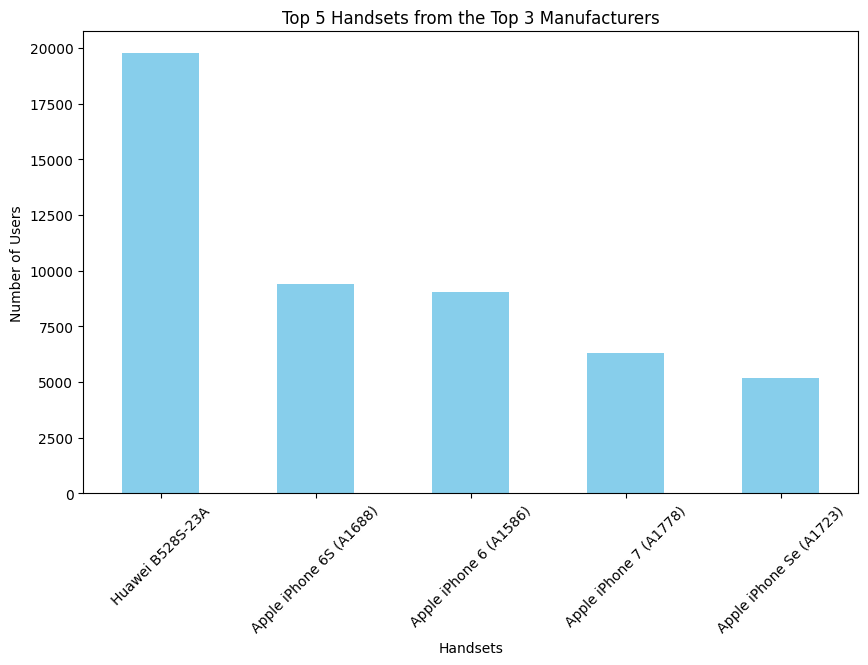

In [5]:
# Step 2: Filter the dataset for the top 3 manufacturers
top_3_manufacturer_names = top_3_manufacturer.index.tolist()  # Get the names of the top 3 manufacturers
filtered_handsets = xdr_handset_df[xdr_handset_df['Handset Manufacturer'].isin(top_3_manufacturer_names)]

# Step 3: Count handsets for these manufacturers
handset_counts = filtered_handsets['Handset Type'].value_counts().head(5)  # Get top 5 handsets

print('\nTop 5 Handsets from the Top 3 Manufacturers:')
print(handset_counts)

# Visualization for top 5 handsets
plt.figure(figsize=(10, 6))
handset_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Handsets from the Top 3 Manufacturers')
plt.xlabel('Handsets')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [62]:
# Specify the columns for which you want to fill missing values
columns_to_fill = [
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Activity Duration DL (ms)",
    "Activity Duration UL (ms)",
    "Dur. (ms).1",
    "Nb of sec with 125000B < Vol DL",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with Vol DL < 6250B",
    "Nb of sec with Vol UL < 1250B",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
    "Total DL (Bytes)",
    "Total UL (Bytes)",
    "Avg RTT UL (ms)",
    "Avg RTT DL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)",
    "Bearer Id",
    "IMSI" ,
    "MSISDN/Number",
    "IMEI",
    "Start ms" ,
    "End ms",
    "Dur. (ms)" ,

]

# Step 1: Check for missing values in the specified columns
missed = xdr_data_df[columns_to_fill].isnull().sum()
print("Missing values in specified columns:")
print(missed)

# Step 2: Fill missing values with the mean for the specified columns
xdr_data_df[columns_to_fill] = xdr_data_df[columns_to_fill].fillna(xdr_data_df[columns_to_fill].mean())

# Step 3: Verify that there are no more missing values in those columns
missed_after_fill = xdr_data_df[columns_to_fill].isnull().sum()
print("Missing values after filling with mean in specified columns:")
print(missed_after_fill)



Missing values in specified columns:
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%)                            0
10 Kbps < UL TP < 50 Kbps (%)                  0
50 Kbps < UL TP < 300 Kbps (%)                 0
UL TP > 300 Kbps (%)                           0
HTTP DL (Bytes)                                0
HTTP UL (Bytes)                                0
Activity Duration DL (ms)                      0
Activity Duration UL (ms)                      0
Dur. (ms).1                                    0
Nb of sec with 125000B < Vol DL                0
Nb of sec with 1250B < Vol UL < 6250B          0
Nb of sec with 31250B < Vol DL < 125000B       0
Nb of sec with 37500B < Vol UL                 0
Nb of sec with 6250B < Vol DL < 31250B         0
Nb of sec with 6250B < Vol UL < 37500B         0
Nb of sec with Vol DL < 6250B   

In [56]:
# Specify the columns to fill with "undefined"
columns_to_fill_text = [ 
    'Start',
    'End',
    'Last Location Name',
    'Handset Manufacturer',
    'Handset Type'
]

# Fill missing values in the specified columns with "undefined"
for column in columns_to_fill_text:  # Corrected to use columns_to_fill_text
    xdr_data_df[column].fillna("undefined", inplace=True)

# Verify that there are no more missing values in the specified columns
missed_after_fill = xdr_data_df[columns_to_fill_text].isnull().sum()
print("Missing values after filling with 'undefined':")
print(missed_after_fill)


Missing values after filling with 'undefined':
Start                   0
End                     0
Last Location Name      0
Handset Manufacturer    0
Handset Type            0
dtype: int64


C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\391777328.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xdr_data_df[column].fillna("undefined", inplace=True)


In [6]:


# Select the relevant numeric columns
relevant_columns = [
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Activity Duration DL (ms)",
    "Activity Duration UL (ms)",
    "Dur. (ms).1",
    "Nb of sec with 125000B < Vol DL",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with Vol DL < 6250B",
    "Nb of sec with Vol UL < 1250B",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
    "Total DL (Bytes)",
    "Total UL (Bytes)",
    "Avg RTT UL (ms)",
    "Avg RTT DL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)"
]

# Create a DataFrame with only the relevant columns
relevant_data = xdr_data_df[relevant_columns]

# Check for missing values
missing_values = relevant_data.isnull().sum()

# Display missing values count for each relevant column
print("Missing Values Count:")
print(missing_values[missing_values > 0])


Missing Values Count:
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)                           792
HTTP DL (Bytes)                              81474
HTTP UL (Bytes)                              81810
Activity Duration DL (ms)                        1
Activity Duration UL (ms)                        1
Dur. (ms).1                                      1
Nb of sec with 125000B < Vol DL              97538
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol DL < 31250B       88317
Nb of sec with 6250B < Vol UL < 37500B      111843
Nb of sec

In [7]:

# Fill missing values with the mean of each column
relevant_data.fillna(relevant_data.mean(), inplace=True)

# Optional: Verify that missing values have been filled
missing_values_after = relevant_data.isnull().sum()
print("\nMissing Values Count After Filling:")
print(missing_values_after)



Missing Values Count After Filling:
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Activity Duration DL (ms)                   0
Activity Duration UL (ms)                   0
Dur. (ms).1                                 0
Nb of sec with 125000B < Vol DL             0
Nb of sec with 1250B < Vol UL < 6250B       0
Nb of sec with 31250B < Vol DL < 125000B    0
Nb of sec with 37500B < Vol UL              0
Nb of sec with 6250B < Vol DL < 31250B      0
Nb of sec with 6250B < Vol UL < 37500B      0
Nb of sec with Vol DL < 6250B               0
Nb of sec with Vol UL < 1250B              

C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\1164986004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data.fillna(relevant_data.mean(), inplace=True)


                       Mean  Median  Standard Deviation
Avg RTT DL (ms)  109.795706    54.0          559.342620
Avg RTT UL (ms)   17.662883     7.0           76.529933


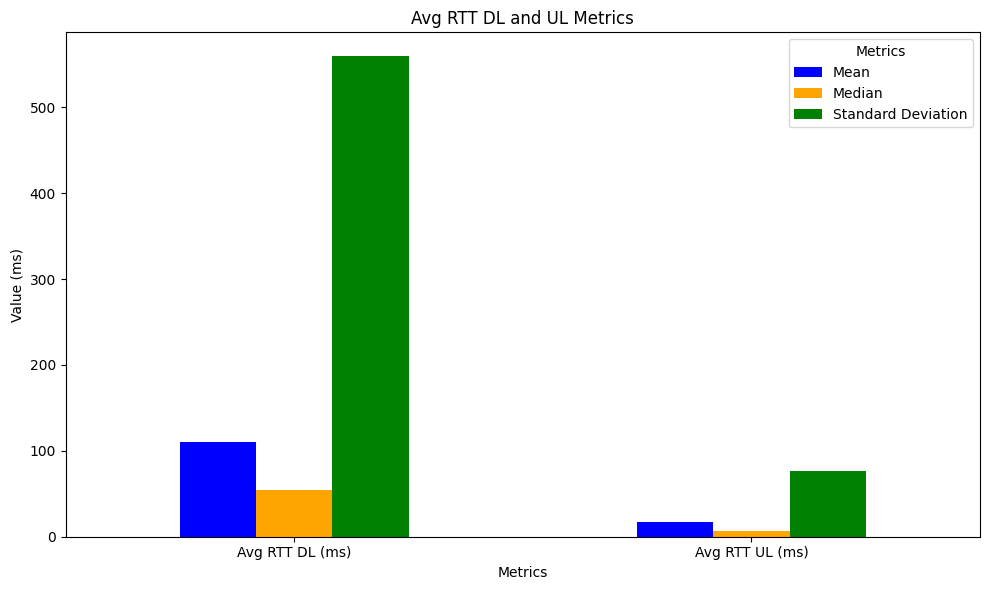

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame named `relevant_data` with your data

# Calculate mean, median, and standard deviation for Avg RTT DL and UL
rtt_metrics = {
    "Mean": [relevant_data["Avg RTT DL (ms)"].mean(), relevant_data["Avg RTT UL (ms)"].mean()],
    "Median": [relevant_data["Avg RTT DL (ms)"].median(), relevant_data["Avg RTT UL (ms)"].median()],
    "Standard Deviation": [relevant_data["Avg RTT DL (ms)"].std(), relevant_data["Avg RTT UL (ms)"].std()],
}

# Create a DataFrame for metrics
rtt_metrics_df = pd.DataFrame(rtt_metrics, index=["Avg RTT DL (ms)", "Avg RTT UL (ms)"])

# Display the metrics DataFrame
print(rtt_metrics_df)

# Plotting the metrics
plt.figure(figsize=(10, 6))
rtt_metrics_df.plot(kind='bar', ax=plt.gca(), color=['blue', 'orange', 'green'])
plt.title('Avg RTT DL and UL Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value (ms)')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()  # Display the plot


In [9]:


# Select the relevant columns
stats_columns = [
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)",
    "HTTP DL (Bytes)",
     "HTTP UL (Bytes)"
]

# Calculate basic statistics
statistics = {}
for column in stats_columns:
    statistics[column] = {
        "Mean": relevant_data[column].mean(),
        "Median": relevant_data[column].median(),
        "Standard Deviation": relevant_data[column].std(),
        "Minimum": relevant_data[column].min(),
        "Maximum": relevant_data[column].max()
    }

# Convert the statistics to a DataFrame for better readability
statistics_df = pd.DataFrame(statistics)

# Display the statistics
print(statistics_df)


                    Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
Mean                           13300.045927              1770.428647   
Median                            63.000000                63.000000   
Standard Deviation             23971.798635              4625.340082   
Minimum                            0.000000                 0.000000   
Maximum                       378160.000000             58613.000000   

                    TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
Mean                               2.080991e+07                 7.596587e+05   
Median                             2.080991e+07                 7.596587e+05   
Standard Deviation                 1.172356e+08                 1.577616e+07   
Minimum                            2.000000e+00                 1.000000e+00   
Maximum                            4.294426e+09                 2.908226e+09   

                    HTTP DL (Bytes)  HTTP UL (Bytes)  
Mean                   1.144710

<Figure size 1000x600 with 0 Axes>

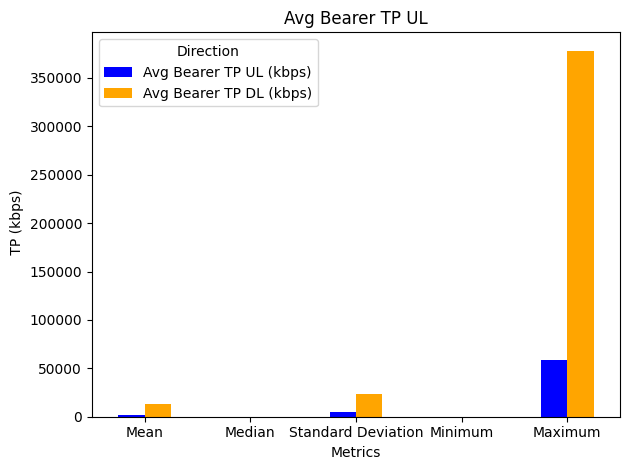

In [10]:
# Create a DataFrame Avg Bearer TP UL
avg_barrer_df = pd.DataFrame({
    "Avg Bearer TP UL (kbps)": statistics_df["Avg Bearer TP UL (kbps)"],
    "Avg Bearer TP DL (kbps)": statistics_df["Avg Bearer TP DL (kbps)"]
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
avg_barrer_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Avg Bearer TP UL')
plt.xlabel('Metrics')
plt.ylabel(' TP (kbps)')
plt.xticks(rotation=0)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()  # Display the plot

<Figure size 1000x600 with 0 Axes>

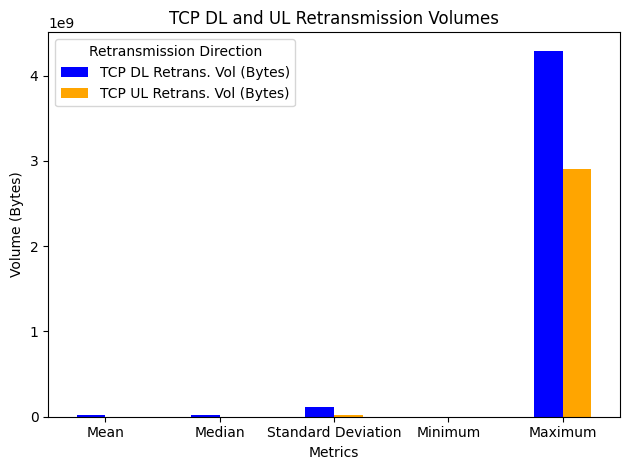

In [11]:

# Create a DataFrame for TCP Retransmission Volume statistics
TCP_df = pd.DataFrame({
    "TCP DL Retrans. Vol (Bytes)": statistics_df["TCP DL Retrans. Vol (Bytes)"],
    "TCP UL Retrans. Vol (Bytes)": statistics_df["TCP UL Retrans. Vol (Bytes)"]
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
TCP_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('TCP DL and UL Retransmission Volumes')
plt.xlabel('Metrics')
plt.ylabel('Volume (Bytes)')
plt.xticks(rotation=0)
plt.legend(title='Retransmission Direction')
plt.tight_layout()
plt.show()  # Display the plot



<Figure size 1000x600 with 0 Axes>

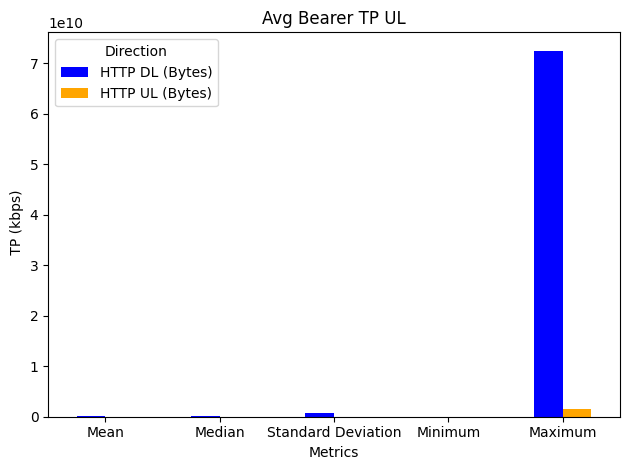

In [12]:
# Create a DataFrame Avg Bearer TP UL
http_df = pd.DataFrame({
    "HTTP DL (Bytes)":statistics_df["HTTP DL (Bytes)"],
    "HTTP UL (Bytes)": statistics_df["HTTP UL (Bytes)"]
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
http_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Avg Bearer TP UL')
plt.xlabel('Metrics')
plt.ylabel(' TP (kbps)')
plt.xticks(rotation=0)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()  # Display the plot

In [13]:
import pandas as pd

# Sample structure of the DataFrame with columns to analyze
columns_to_analyze = [
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)"
]

# Check for duplicate column names in relevant_data
if relevant_data.columns.duplicated().any():
    print("Warning: Duplicate column names found. Please ensure column names are unique.")
else:
    print("No duplicate column names detected.")

# Initialize an empty DataFrame to store results
threshold_counts = pd.DataFrame(index=['100%', '75%', '50%', '25%', '< 25%'], columns=columns_to_analyze)

# Loop through each column and calculate thresholds
for column in columns_to_analyze:
    if column in relevant_data.columns:
        threshold_counts.loc['100%', column] = relevant_data[relevant_data[column] == 100].shape[0]
        threshold_counts.loc['75%', column] = relevant_data[(relevant_data[column] >= 75) & (relevant_data[column] < 100)].shape[0]
        threshold_counts.loc['50%', column] = relevant_data[(relevant_data[column] >= 50) & (relevant_data[column] < 75)].shape[0]
        threshold_counts.loc['25%', column] = relevant_data[(relevant_data[column] >= 25) & (relevant_data[column] < 50)].shape[0]
        threshold_counts.loc['< 25%', column] = relevant_data[relevant_data[column] < 25].shape[0]
    else:
        print(f"Warning: Column '{column}' not found in relevant_data.")

# Display the counts DataFrame
print("Threshold Counts for Each Column:")
print(threshold_counts)





No duplicate column names detected.
Threshold Counts for Each Column:
      DL TP < 50 Kbps (%) 50 Kbps < DL TP < 250 Kbps (%)  \
100%                87044                              0   
75%                 47551                             10   
50%                 12911                            142   
25%                  2285                           2198   
< 25%                 210                         147651   

      250 Kbps < DL TP < 1 Mbps (%) DL TP > 1 Mbps (%) UL TP < 10 Kbps (%)  \
100%                              1                  0               91663   
75%                               1                 14               57256   
50%                              63                108                 793   
25%                             686               1449                 222   
< 25%                        149250             148430                  67   

      10 Kbps < UL TP < 50 Kbps (%) 50 Kbps < UL TP < 300 Kbps (%)  \
100%                          

<Figure size 1200x800 with 0 Axes>

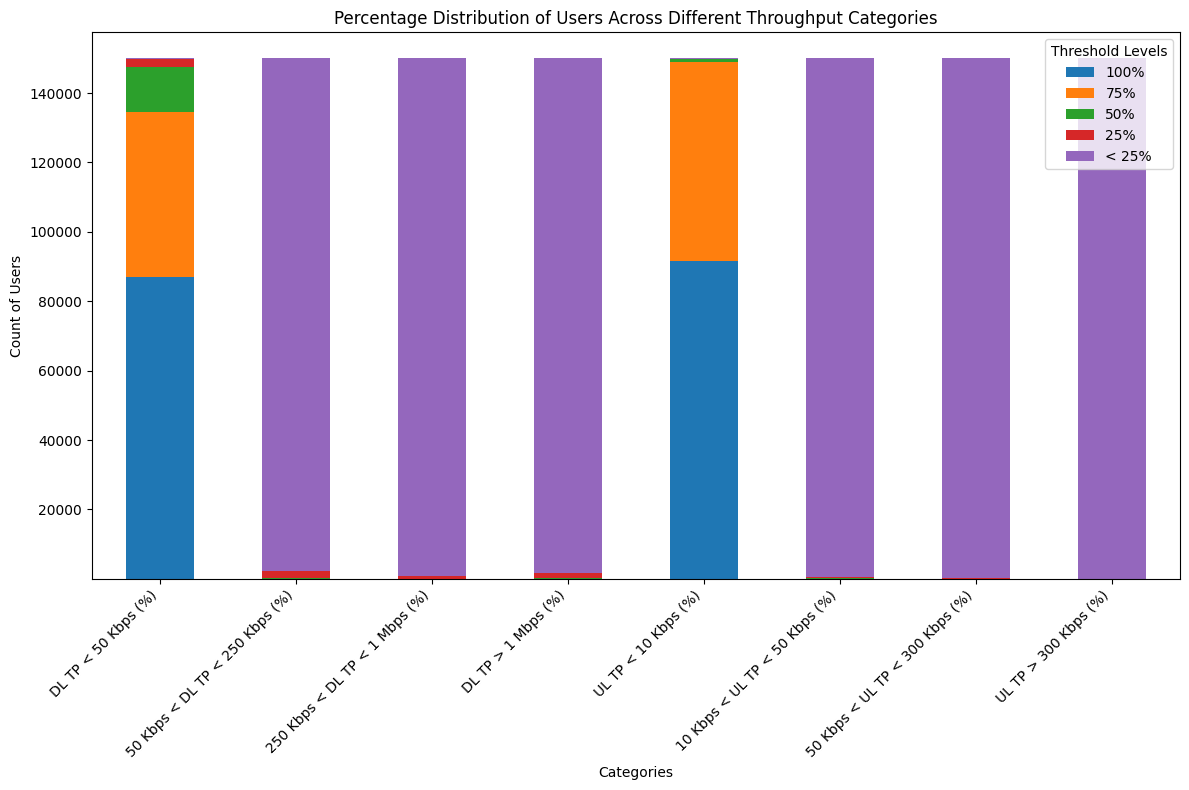

In [14]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot the threshold counts using a stacked bar plot
threshold_counts.T.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], figsize=(12, 8))

# Add titles and labels
plt.title("Percentage Distribution of Users Across Different Throughput Categories")
plt.xlabel("Categories")
plt.ylabel("Count of Users")
plt.legend(title="Threshold Levels", loc="upper right")
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
total_entries = len(xdr_data_df)
print("Total Number of Entries in the Dataset:", total_entries)
# Sum the values in the 'Dur. (ms).1' column
total_duration_ms = xdr_data_df['Dur. (ms).1'].sum()
total_duration_in_hour=total_duration_ms/3600000
total_dl = xdr_data_df['Total DL (Bytes)'].sum()
total_ul=xdr_data_df['Total UL (Bytes)'].sum()


# lets do the social medias together
# Sum the specified columns
sum_columns = [
    'Social Media DL (Bytes)',
    'Social Media UL (Bytes)',
    'Netflix DL (Bytes)',
    'Netflix UL (Bytes)',
    'Google DL (Bytes)',
    'Google UL (Bytes)',
    'Email DL (Bytes)',
    'Email UL (Bytes)',
    'Gaming DL (Bytes)',
    'Gaming UL (Bytes)',
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)"
    
]

# Create a dictionary to hold the sums
sums = {column: xdr_data_df[column].sum() for column in sum_columns}

# Convert the sums to a DataFrame for better display
sums_df = pd.DataFrame(list(sums.items()), columns=['Column Name', 'Sum (Bytes)'])

# Display the sums
print(sums_df)

# Print the result
print("Total Duration (ms):", total_duration_ms)
print("total duration (hr) : " , total_duration_in_hour,"hr")
print("total dl data :", total_dl, "Byte")
print("totla ul :", total_ul, 'byte')



Total Number of Entries in the Dataset: 150001
                Column Name   Sum (Bytes)
0   Social Media DL (Bytes)  2.693001e+11
1   Social Media UL (Bytes)  4.939298e+09
2        Netflix DL (Bytes)  1.744039e+12
3        Netflix UL (Bytes)  1.650274e+12
4         Google DL (Bytes)  8.626186e+11
5         Google UL (Bytes)  3.084833e+11
6          Email DL (Bytes)  2.687611e+11
7          Email UL (Bytes)  7.010648e+10
8         Gaming DL (Bytes)  6.330713e+13
9         Gaming UL (Bytes)  1.243268e+12
10       Youtube DL (Bytes)  1.745123e+12
11       Youtube UL (Bytes)  1.651423e+12
Total Duration (ms): 15691365831902.0
total duration (hr) :  4358712.731083889 hr
total dl data : 68196514511845.0 Byte
totla ul : 6168180943816.0 byte


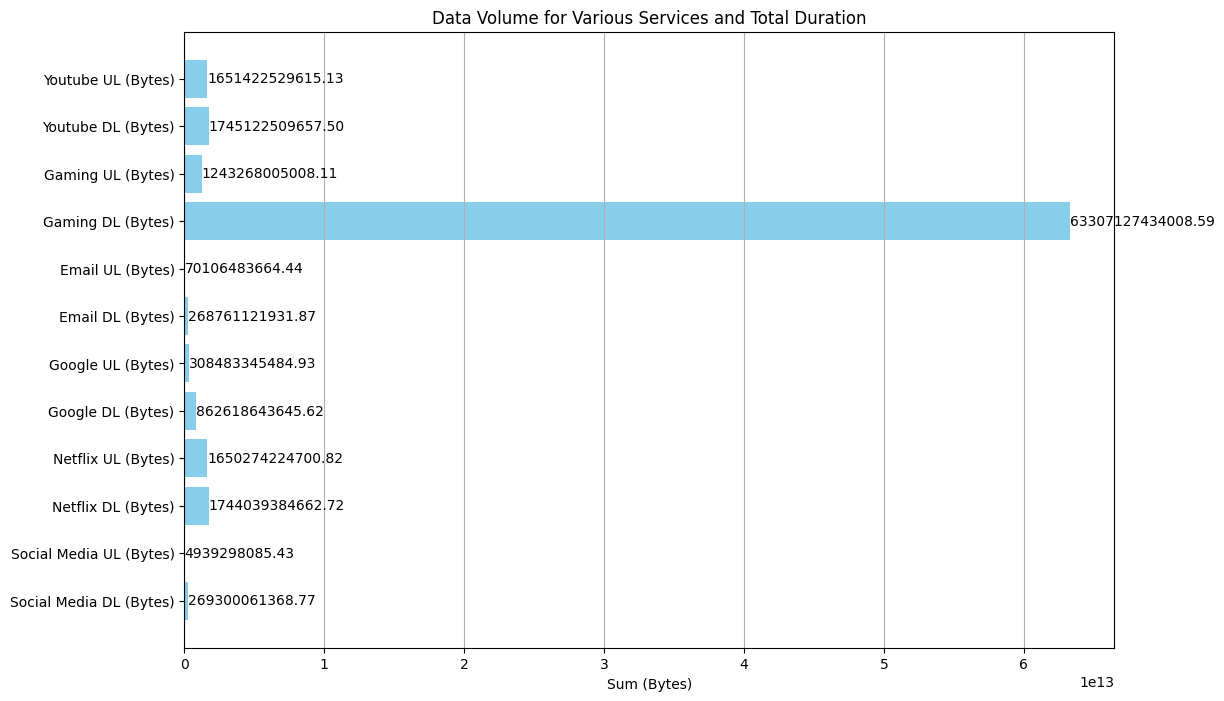

In [16]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 8))

# Plotting the data with totals included in the bar plot
plt.barh(sums_df['Column Name'], sums_df['Sum (Bytes)'], color='skyblue')
plt.xlabel('Sum (Bytes)')
plt.title('Data Volume for Various Services and Total Duration')

# Adding text labels for clarity
for index, value in enumerate(sums_df['Sum (Bytes)']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10,
             color='red' if 'Total' in sums_df['Column Name'][index] else 'black')

# Adding grid for better readability
plt.grid(axis='x')

plt.show()


C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\3433183538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['Total Data (Bytes)'] = relevant_data['Total DL (Bytes)'] +relevant_data['Total UL (Bytes)']
C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\3433183538.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the o

Correlation between each application and total data:
                Application  Correlation with Total Data
0   Social Media DL (Bytes)                     0.005380
1   Social Media UL (Bytes)                     0.000196
2        Netflix DL (Bytes)                     0.024331
3        Netflix UL (Bytes)                     0.024944
4         Google DL (Bytes)                     0.012108
5         Google UL (Bytes)                     0.005840
6          Email DL (Bytes)                     0.004283
7          Email UL (Bytes)                    -0.001483
8         Gaming DL (Bytes)                     0.998068
9         Gaming UL (Bytes)                     0.020431
10       Youtube DL (Bytes)                     0.025642
11       Youtube UL (Bytes)                     0.023722


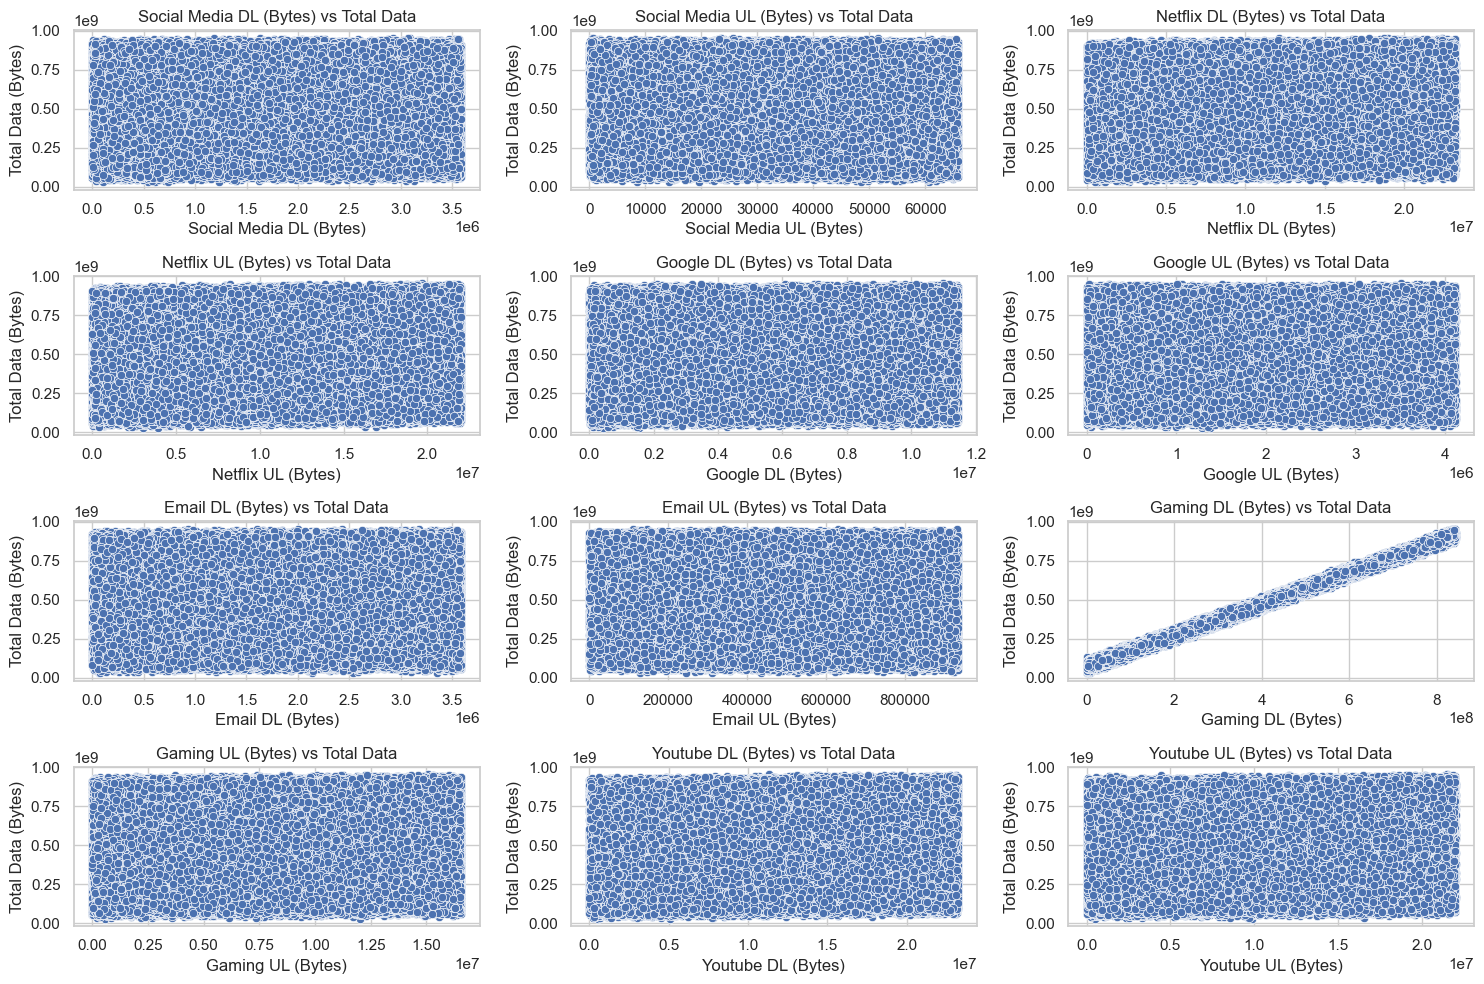

In [60]:
from scipy.stats import pearsonr
# Combine total DL and UL for bivariate analysis
relevant_data['Total Data (Bytes)'] = relevant_data['Total DL (Bytes)'] +relevant_data['Total UL (Bytes)']
# Fill missing values in the 'Total Data (Bytes)' column with the mean
xdr_data_df['Total Data (Bytes)'].fillna(xdr_data_df['Total Data (Bytes)'].mean(), inplace=True)
# Compute correlations
correlations = {col: pearsonr(relevant_data[col], relevant_data['Total Data (Bytes)'])[0] for col in sum_columns}

# Display correlations
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Application', 'Correlation with Total Data'])
print("Correlation between each application and total data:")
print(correlation_df)

# Visualize the relationship between each application’s data and total data using scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(sum_columns, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=xdr_data_df[col], y=xdr_data_df['Total Data (Bytes)'])
    plt.title(f"{col} vs Total Data")
    plt.xlabel(col)
    plt.ylabel("Total Data (Bytes)")
plt.tight_layout()
plt.show()

In [40]:
# Calculate the median correctly by calling the method
middle_dur = relevant_data["Dur. (ms).1"].median()  # Note the parentheses
print("median:", middle_dur)

# Filter based on the median value to create a new DataFrame
top_50 = relevant_data[relevant_data["Dur. (ms).1"] > middle_dur]

# Count the number of users in the top 50% using the shape attribute
top_50_amount = top_50.shape[0]  # Use shape[0] to get the number of rows
print("Number of users in the top 50%:", top_50_amount)

# Check the columns in the top_50 DataFrame
print("Columns in top_50:", top_50.columns)



median: 86399983.0
Number of users in the top 50%: 74934
Columns in top_50: Index(['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
       'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google 

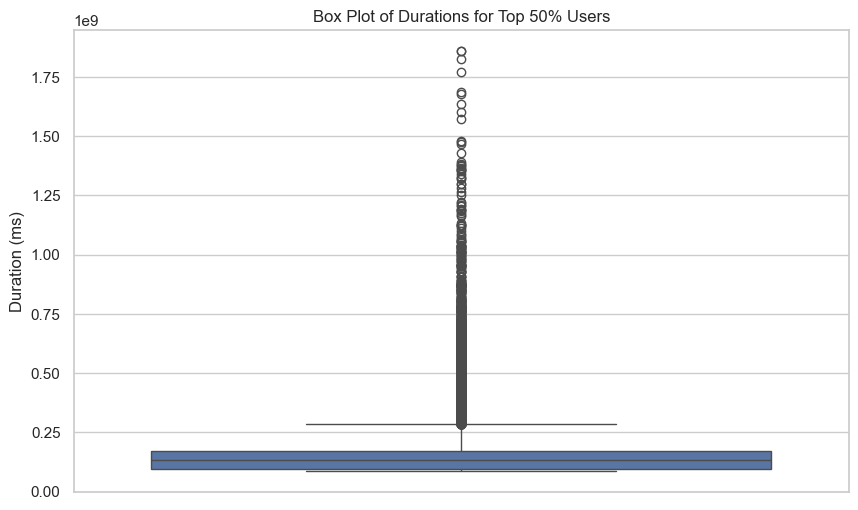

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for the 'Dur. (ms).1' of top 50% users
plt.figure(figsize=(10, 6))
sns.boxplot(y=top_50["Dur. (ms).1"])
plt.title('Box Plot of Durations for Top 50% Users')
plt.ylabel('Duration (ms)')
plt.show()


In [45]:
relevant_data['Total Data (Bytes)'] = relevant_data['Total DL (Bytes)'] +relevant_data['Total UL (Bytes)']
# Step 2: Create the 'Total Data (Bytes)' column in top_50 if it's not there
top_50['Total Data (Bytes)'] = top_50['Total DL (Bytes)'] +top_50 ['Total UL (Bytes)']
top_50['Data Decile'] = pd.qcut(
    top_50['Total Data (Bytes)'], 
    q=5, 
    labels=[5, 4, 3, 2, 1]  # 1 being the highest data users, 5 the lowest within the top 50%
)

# Step 4: Calculate total data usage per decile
decile_summary = top_50.groupby('Data Decile')['Total Data (Bytes)'].sum().reset_index()

# Display the result
print("Total Data Usage per Decile for Top 50% Users:")
print(decile_summary)
   

Total Data Usage per Decile for Top 50% Users:
  Data Decile  Total Data (Bytes)
0           5        2.359880e+12
1           4        4.897476e+12
2           3        7.438469e+12
3           2        9.963179e+12
4           1        1.250162e+13


C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\1623231625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['Total Data (Bytes)'] = relevant_data['Total DL (Bytes)'] +relevant_data['Total UL (Bytes)']
C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\1623231625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50['Total Data (Bytes)'] = top_50['Total DL (Bytes)'] +top_50 ['Total UL (Bytes)']
C:\Users\sumey\AppData\Local\Temp\ipykernel_26660\1623231625.py:4: SettingWithCopyWarning: 


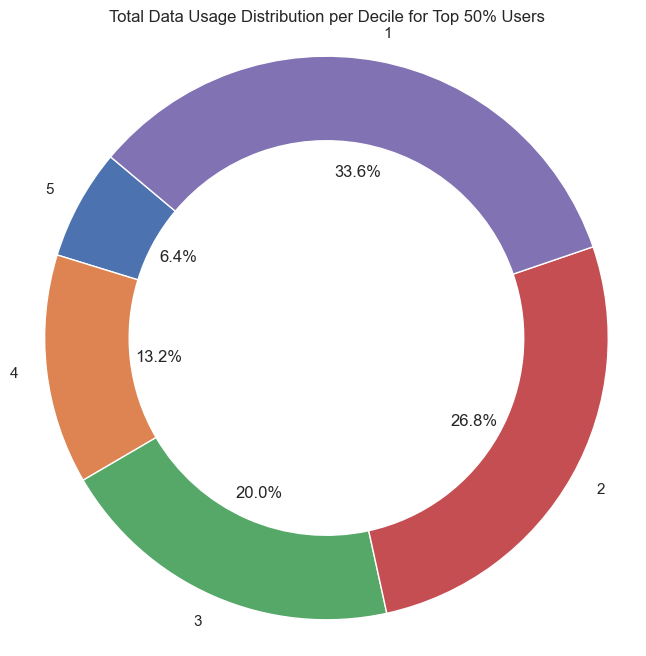

In [46]:
# Create a donut chart for total data usage per decile
plt.figure(figsize=(8, 8))
plt.pie(decile_summary['Total Data (Bytes)'], labels=decile_summary['Data Decile'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Total Data Usage Distribution per Decile for Top 50% Users')
plt.axis('equal')  # Equal aspect ratio ensures that donut is drawn as a circle.
plt.show()


                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   

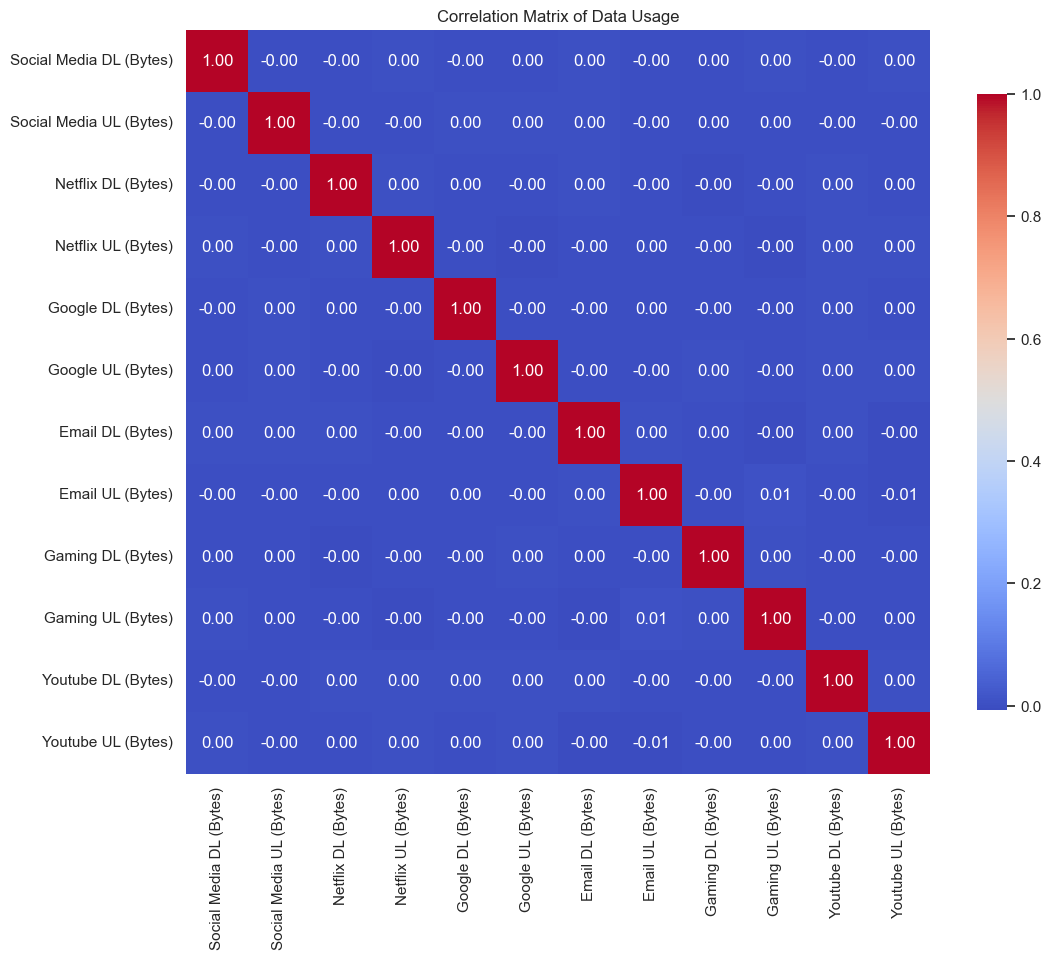

In [51]:
# Calculate the correlation matrix
correlation_matrix = xdr_data_df[sum_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Data Usage')
plt.show()

In [64]:
from sqlalchemy import create_engine
import pandas as pd

# Database connection parameters
host = 'localhost'
port = '5432'
dbname = 'telecommunication'
user = 'postgres'
password = 'aym'

# Create the database engine
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

# Save the DataFrame to PostgreSQL
xdr_data_df.to_sql('processed_xdr_data', engine, if_exists='replace', index=False)

print("Data successfully saved to PostgreSQL database.")


Data successfully saved to PostgreSQL database.
